In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
num_articles = 7
article_content_list = []
article_name_list = []

for i in range(num_articles):
    tech_file = open('tech_news_sa%d.txt'%(i+1),'r',encoding="utf8")
    article_content_list.append(tech_file.read())
    article_name_list.append('news_%d.txt'%(i+1))
    tech_file.close()

document_df = pd.DataFrame({'name':article_name_list, 'content':article_content_list})
document_df.head()


,name,content
0,news_1.txt,Minister Tau challenges blocking of R14bn Voda...
1,news_2.txt,Inclusive infrastructure key to Africa’s conne...
2,news_3.txt,\nThe Digital News Transformation Fund aims to...
3,news_4.txt,Top ICT tenders: SASSA aims to pay right grant...
4,news_5.txt,The business case for Data Security Posture Ma...


In [4]:
import re 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


def preprocess(text):
    pattern=r'[^a-zA-Z\s]'
    clean_text = re.sub(pattern,'',text)#remove non alphabetic characters
    clean_text = clean_text.lower()    
    pattern = r"\b\w\b\s*"#remove single standing characters
    clean_text = re.sub(pattern,'',clean_text)   
    #removing stop words
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(clean_text)
    filtered_sentence = [word for word in word_tokens if word.lower() not in stop_words]
    _text = ' '.join(filtered_sentence)  
    return _text

    
    
document_df['clean_content'] = document_df['content'].apply(preprocess)
document_df.head()

,name,content,clean_content
0,news_1.txt,Minister Tau challenges blocking of R14bn Voda...,minister tau challenges blocking rbn vodacomma...
1,news_2.txt,Inclusive infrastructure key to Africa’s conne...,inclusive infrastructure key africas connectiv...
2,news_3.txt,\nThe Digital News Transformation Fund aims to...,digital news transformation fund aims proactiv...
3,news_4.txt,Top ICT tenders: SASSA aims to pay right grant...,top ict tenders sassa aims pay right grant rig...
4,news_5.txt,The business case for Data Security Posture Ma...,business case data security posture management...


In [10]:
lemmatizer = WordNetLemmatizer()
# Tokenisation and lemmatisation function
def process_text_local(text):
    # Tokenize
    tokens = [word for word in text.lower().split()]
    # Lemmatise tokens
    lemmatised = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatised

# Apply lemmatisation
document_df['lemmatised'] = document_df['clean_content'].apply(lambda x: ' '.join(process_text_local(x)))
document_df.head()

,name,content,clean_content,lemmatised
0,news_1.txt,Minister Tau challenges blocking of R14bn Voda...,minister tau challenges blocking rbn vodacomma...,minister tau challenge blocking rbn vodacommaz...
1,news_2.txt,Inclusive infrastructure key to Africa’s conne...,inclusive infrastructure key africas connectiv...,inclusive infrastructure key africa connectivi...
2,news_3.txt,\nThe Digital News Transformation Fund aims to...,digital news transformation fund aims proactiv...,digital news transformation fund aim proactive...
3,news_4.txt,Top ICT tenders: SASSA aims to pay right grant...,top ict tenders sassa aims pay right grant rig...,top ict tender sassa aim pay right grant right...
4,news_5.txt,The business case for Data Security Posture Ma...,business case data security posture management...,business case data security posture management...


In [12]:
from nltk.tokenize import word_tokenize
document_df['tokens'] = document_df['lemmatised'].apply(lambda x: word_tokenize(x))
document_df.head()

,name,content,clean_content,lemmatised,tokens
0,news_1.txt,Minister Tau challenges blocking of R14bn Voda...,minister tau challenges blocking rbn vodacomma...,minister tau challenge blocking rbn vodacommaz...,"[minister, tau, challenge, blocking, rbn, voda..."
1,news_2.txt,Inclusive infrastructure key to Africa’s conne...,inclusive infrastructure key africas connectiv...,inclusive infrastructure key africa connectivi...,"[inclusive, infrastructure, key, africa, conne..."
2,news_3.txt,\nThe Digital News Transformation Fund aims to...,digital news transformation fund aims proactiv...,digital news transformation fund aim proactive...,"[digital, news, transformation, fund, aim, pro..."
3,news_4.txt,Top ICT tenders: SASSA aims to pay right grant...,top ict tenders sassa aims pay right grant rig...,top ict tender sassa aim pay right grant right...,"[top, ict, tender, sassa, aim, pay, right, gra..."
4,news_5.txt,The business case for Data Security Posture Ma...,business case data security posture management...,business case data security posture management...,"[business, case, data, security, posture, mana..."


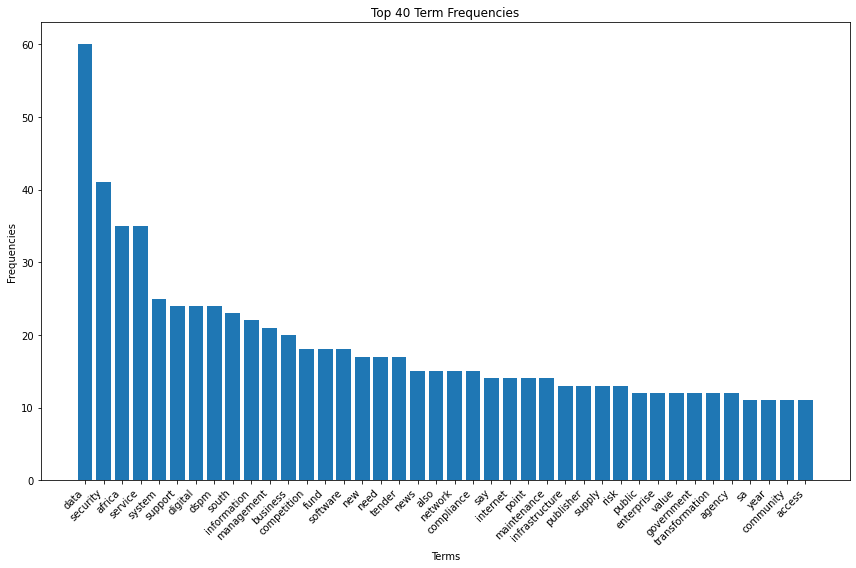

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

# Aggregate all tokens from the 'tokens' column
all_tokens = [token for sublist in document_df['tokens'] for token in sublist]
# Calculate term frequencies
term_frequencies = Counter(all_tokens)
# Get the top 40 terms and their frequencies
top_40_terms = term_frequencies.most_common(40)
terms, frequencies = zip(*top_40_terms)
# Plot the term frequency bar chart
plt.figure(figsize=(12, 8))
plt.bar(terms, frequencies)
plt.xticks(rotation=45, ha='right')
plt.title('Top 40 Term Frequencies')
plt.xlabel('Terms')
plt.ylabel('Frequencies')
plt.tight_layout()
plt.show()

In [29]:
article_1_tokens = document_df.loc[0,['tokens']].tokens
# Calculate term frequencies
term_frequencies = Counter(article_1_tokens)
# Get the top 40 terms and their frequencies
tf_terms = term_frequencies.most_common(len(term_frequencies))
terms, frequencies = zip(*tf_terms)
tf_df = pd.DataFrame({'term':terms,'freq':frequencies})
tf_df.head()

,term,freq
0,competition,17
1,tribunal,8
2,minister,7
3,tau,7
4,deal,7


In [41]:
tf_df.iloc[0,0]

'competition'

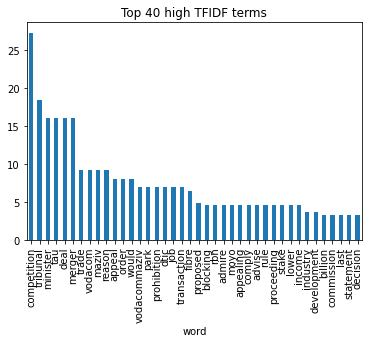

In [44]:
import numpy as np
from operator import itemgetter

#Computing the IDF and TF-IDF
idf_item_list = []
n = len(tf_df)
top_n = 40

for wi in range(n):      
    item_wi = tf_df.iloc[wi,0] 
    item_fi = tf_df.iloc[wi,1] 
    item_ci = 0    
    for i in range(1,7):
        corpus_text_word_list = document_df.tokens[i]         
        if item_wi in corpus_text_word_list:
            item_ci += 1    
    idf_item_list.append([item_wi,item_fi*np.log(10/(item_ci+1))])    
sorted_items = sorted(idf_item_list, key=itemgetter(1), reverse=True)    
freq_items = sorted_items[0:top_n] #Select terms with top TF-IDF
tf_idf = pd.DataFrame(freq_items, columns = ['word','count'])
ax = tf_idf.plot.bar(x='word', y='count', title='Top %d high TFIDF terms'%top_n,legend=False)

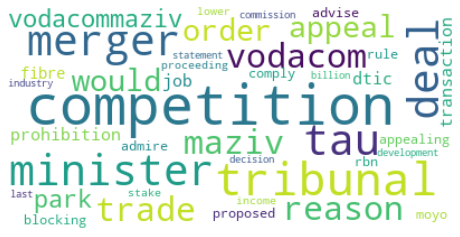

In [46]:
from wordcloud import WordCloud
import seaborn as sns 
word_freq = {}
num_terms = len(tf_idf)
for i in range(num_terms):
    freq = tf_idf.iloc[i,1]
    term = tf_idf.iloc[i,0]
    word_freq[term] = freq

wordcloud  = WordCloud(max_font_size=50, 
                          max_words=top_n, background_color="white").generate_from_frequencies(word_freq)
plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()
